# Creating a dataset


In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import table
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
sns.set()
%matplotlib inline

In [2]:
#loading Galaxy files
filepath= "/home/veroastro/Documents/spectraTypes/MLphotometry/data/"
galaxy = pd.read_csv(filepath+"galaxy_nophotoZ4.csv")
star = pd.read_csv(filepath+"star_nophotoZ.csv")
QSO = pd.read_csv(filepath+"QSO_nophotoZ.csv")
extra_z = pd.read_csv(filepath+"highZ.csv")

In [3]:
#merging the galaxies dataset
data = pd.concat([galaxy,star,QSO], ignore_index=True)
data.head()

,objID,type,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,z,zErr,zWarning,class,subClass
0,1237667537458299365,3,18.21058,0.018977,17.24983,0.004715,16.88210,0.004603,16.55619,0.004672,16.45187,0.012121,0.077160,0.000004,0,GALAXY,STARBURST
1,1237667916487852220,3,18.76317,0.042192,17.77250,0.009990,17.42913,0.010302,17.24287,0.013719,17.12944,0.042872,0.013894,0.000008,0,GALAXY,STARFORMING
2,1237654628399382816,3,19.80264,0.072546,17.96712,0.008193,16.99161,0.005670,16.57174,0.005696,16.27743,0.013276,0.133378,0.000024,0,GALAXY,NaN
3,1237662336256377045,3,19.66521,0.061793,18.17861,0.009299,17.33417,0.006656,16.88305,0.006626,16.60681,0.016936,0.127557,0.000022,0,GALAXY,NaN
4,1237666406847938796,3,18.43225,0.037471,16.73321,0.005107,16.02269,0.004076,15.56729,0.003940,15.30786,0.008721,0.059000,0.000008,0,GALAXY,STARBURST


In [4]:
all_data = pd.concat([data, extra_z], ignore_index=True, axis=0, join='outer')
all_data.shape

(20000, 17)

In [7]:
extra= all_data.duplicated()
sum(extra)

73

In [12]:
full_data = all_data.drop_duplicates(keep='last')
full_data.shape

(19927, 17)

/home/veroastro/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


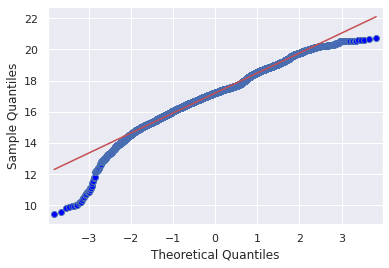

In [23]:
# q-q plot
qqplot(all_data['dered_r'], line='s')
pyplot.show()

/home/veroastro/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


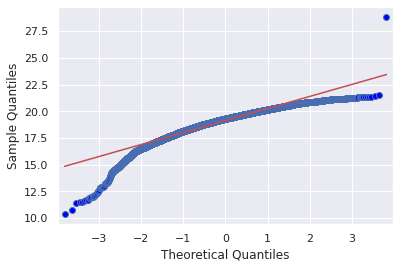

In [24]:
qqplot(all_data['dered_u'], line='s')
pyplot.show()

In [19]:
#Saving dataset to file
all_data.to_csv(filepath+"all_data.csv", index= False)

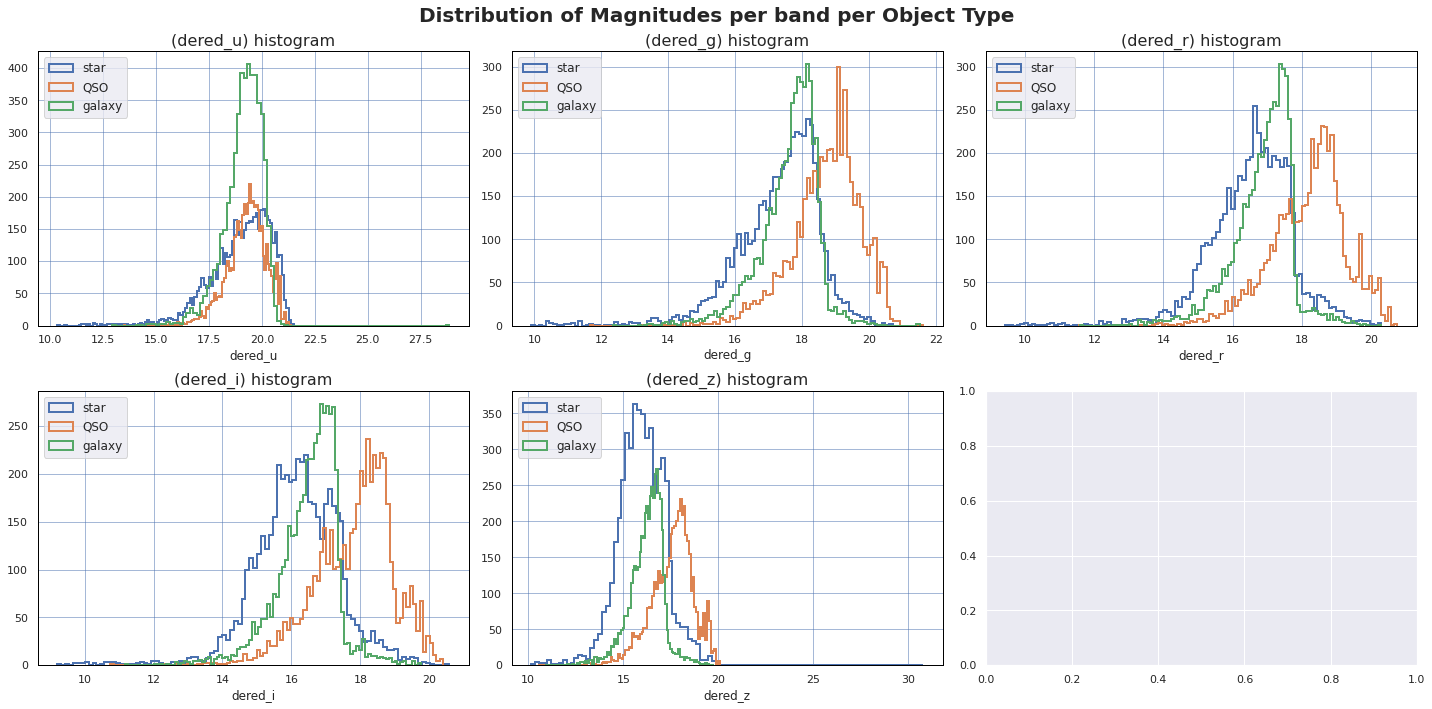

In [27]:
# Create histograms of the colours for each object type in the same plot
# Create boolean series for each of the classes of objects
star = all_data['class']  =='STAR'
QSO = all_data['class']  == 'QSO'
galaxy = all_data['class']  == 'GALAXY'
cols = ['dered_u','dered_g','dered_r','dered_i','dered_z']
bins= 100
# Create subplots and plot histograms
fig,axs = plt.subplots(2,3, figsize=(20,10), edgecolor='black')
axs = axs.ravel()

for i, n in enumerate(cols):
    ax = axs[i]
    X = all_data[n]
    if i < len(cols):
        #create the histograms for the object type per band
        ax.hist(X[star], bins,histtype='step', linewidth=2,label='star')
        ax.hist(X[QSO], bins,histtype='step', linewidth=2, label='QSO')
        ax.hist(X[galaxy], bins,histtype='step', linewidth=2, label='galaxy')
        # Making it pretty with frame and grid
        ax.spines['top'].set_color('black')
        ax.spines['right'].set_color('black')
        ax.spines['bottom'].set_color('black')
        ax.spines['left'].set_color('black')
        ax.spines['top'].set_linewidth(1)
        ax.spines['right'].set_linewidth(1)
        ax.spines['bottom'].set_linewidth(1)
        ax.spines['left'].set_linewidth(1)
        ax.grid(color='b', linestyle='-', linewidth=0.5)
        ax.set_facecolor('xkcd:white')
        #set legend, lables and title
        ax.legend(loc='upper left',fontsize=12)
        ax.set_xlabel(n)
        ax.set_title(f'({n}) histogram', fontsize=16)
    else:
        fig.delaxes(ax=ax)
            
fig.suptitle('Distribution of Magnitudes per band per Object Type', fontsize=20, fontweight="bold")
fig.tight_layout()
plt.show()

In [33]:
galaxy2 = pd.read_csv(filepath+"galaxy_nophotoZ.csv")
QSO2 = pd.read_csv(filepath+"QSO_nophotoZ.csv")

(array([7.230e+02, 1.189e+03, 1.385e+03, 1.244e+03, 4.170e+02, 3.100e+01,
        1.000e+00, 5.000e+00, 0.000e+00, 5.000e+00]),
 array([0.0440169 , 0.64596321, 1.24790952, 1.84985583, 2.45180214,
        3.05374845, 3.65569476, 4.25764107, 4.85958738, 5.46153369,
        6.06348   ]),
 <BarContainer object of 10 artists>)

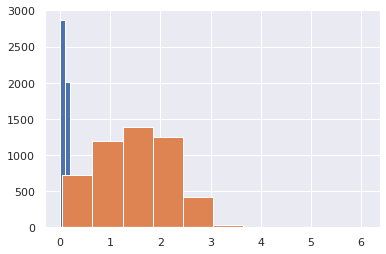

In [36]:
plt.hist(galaxy2['z'])
plt.hist(QSO2['z'])